**Importiere die notwendigen Packages**

In [1]:
# Empfehlung für Colab: Installiere alles was Du brauchst
# %pip install pandas pivottablejs numpy altair matplotlib geopandas folium

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bau_best_geb_ea_pers_nat_gebland_quartier_jahr_od6984

(int_dwh)

In [ ]:
# Filepath
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bau_best_geb_ea_pers_nat_gebland_quartier_jahr_OD6984/BAU698OD6984.csv"

# bau_best_whg_wfl_pers_ea_quartier_jahr_od6982



# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [ ]:
type(data2betested)

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [ ]:
data2betested.head(300)

In [16]:
data2betested.dtypes

StichtagDatJahr     int64
QuarSort18          int64
QuarLang18         object
KreisSort           int64
KreisLang          object
EigGruSort          int64
EigGruLang         object
AnzGebMitPers       int64
PersTotal           int64
NatCHGebCH          int64
NatCHGebAu          int64
NatAuGebCH          int64
NatAuGebAu          int64
dtype: object

In [17]:
data2betested.shape

(1508, 13)

Beschreibe einzelne Attribute

In [18]:
data2betested.describe()

,StichtagDatJahr,QuarSort18,KreisSort,EigGruSort,AnzGebMitPers,PersTotal,NatCHGebCH,NatCHGebAu,NatAuGebCH,NatAuGebAu
count,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508
mean,2014,69,7,2,311,3498,1938,453,152,955
std,4,35,3,1,289,2745,1542,379,148,832
min,2008,10,1,1,6,118,59,17,0,23
25%,2011,41,4,2,101,1302,727,160,40,292
50%,2014,71,7,2,203,2724,1294,355,101,705
75%,2017,101,10,3,422,5651,3101,656,222,1387
max,2020,123,12,4,1274,12181,6129,2095,833,4065


Wie viele Nullwerte gibt es im Datensatz?

In [19]:
data2betested.isnull().sum()

StichtagDatJahr    0
QuarSort18         0
QuarLang18         0
KreisSort          0
KreisLang          0
EigGruSort         0
EigGruLang         0
AnzGebMitPers      0
PersTotal          0
NatCHGebCH         0
NatCHGebAu         0
NatAuGebCH         0
NatAuGebAu         0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [21]:
data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested


,StichtagDatJahr,QuarSort18,QuarLang18,KreisSort,KreisLang,EigGruSort,EigGruLang,AnzGebMitPers,PersTotal,NatCHGebCH,NatCHGebAu,NatAuGebCH,NatAuGebAu
0,2008-01-01,10,Kreis 1,1,Kreis 1,1,Öffentlich/Genossenschaftlich,202,1689,1310,191,32,156
1,2008-01-01,10,Kreis 1,1,Kreis 1,2,Übrige private Gesellschaften,218,1320,665,111,19,525
2,2008-01-01,10,Kreis 1,1,Kreis 1,3,Natürliche Personen,426,2117,1245,183,44,645
3,2008-01-01,10,Kreis 1,1,Kreis 1,4,Im Stockwerkeigentum,63,410,243,51,6,110
4,2009-01-01,10,Kreis 1,1,Kreis 1,1,Öffentlich/Genossenschaftlich,201,1699,1299,193,29,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,2019-01-01,123,Hirzenbach,12,Kreis 12,4,Im Stockwerkeigentum,20,549,226,115,44,164
1504,2020-01-01,123,Hirzenbach,12,Kreis 12,1,Öffentlich/Genossenschaftlich,571,6494,3686,1235,315,1258
1505,2020-01-01,123,Hirzenbach,12,Kreis 12,2,Übrige private Gesellschaften,166,3618,1364,536,300,1418
1506,2020-01-01,123,Hirzenbach,12,Kreis 12,3,Natürliche Personen,224,2301,879,370,170,882


Bereite die Daten für die Grafik unten vor

In [22]:
Jahre = data2betested.groupby("StichtagDatJahr")
len(Jahre)

13

In [23]:
for key, group in Jahre:
    print(key, len(group))

2008-01-01 00:00:00 116
2009-01-01 00:00:00 116
2010-01-01 00:00:00 116
2011-01-01 00:00:00 116
2012-01-01 00:00:00 116
2013-01-01 00:00:00 116
2014-01-01 00:00:00 116
2015-01-01 00:00:00 116
2016-01-01 00:00:00 116
2017-01-01 00:00:00 116
2018-01-01 00:00:00 116
2019-01-01 00:00:00 116
2020-01-01 00:00:00 116


In [24]:
myJahr = "2020-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr.head(3)


,StichtagDatJahr,QuarSort18,QuarLang18,KreisSort,KreisLang,EigGruSort,EigGruLang,AnzGebMitPers,PersTotal,NatCHGebCH,NatCHGebAu,NatAuGebCH,NatAuGebAu
48,2020-01-01,10,Kreis 1,1,Kreis 1,1,Öffentlich/Genossenschaftlich,196,1756,1299,206,32,219
49,2020-01-01,10,Kreis 1,1,Kreis 1,2,Übrige private Gesellschaften,245,1521,693,173,25,630
50,2020-01-01,10,Kreis 1,1,Kreis 1,3,Natürliche Personen,383,2049,1108,238,44,659


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [26]:
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    
test = data2betested.groupby(
    ['StichtagDatJahr']
#   ['Jahr','QuarSort', 'QuarLang']
).agg(
    {
        'NatCHGebCH': 'sum',
         'NatCHGebAu': 'sum',
        'NatAuGebCH': 'sum',
         'NatAuGebAu': 'sum',        
        'PersTotal':'sum',
    }
)
test.head(100)
    

,NatCHGebCH,NatCHGebAu,NatAuGebCH,NatAuGebAu,PersTotal
StichtagDatJahr,,,,,
2008-01-01,217526,44148,18655,98983,379312
2009-01-01,218076,46123,17702,99274,381175
2010-01-01,219102,48235,17017,100154,384508
2011-01-01,219345,49127,17054,103838,389364
2012-01-01,220498,50161,16980,106078,393717
2013-01-01,221433,51083,17068,108737,398321
2014-01-01,223209,51993,17408,111502,404112
2015-01-01,225501,53676,17435,113716,410328
2016-01-01,227271,54593,17640,115677,415181


**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [27]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [29]:
mySelection = aktuellesJahr.groupby(
    ['StichtagDatJahr','QuarSort18', 'QuarLang18']
#   ['Jahr','QuarSort', 'QuarLang']
).agg(
    {
        'NatCHGebCH': 'sum',
         'NatCHGebAu': 'sum',
        'NatAuGebCH': 'sum',
         'NatAuGebAu': 'sum',        
        'PersTotal':'sum',
    }
)
mySelection


NatCHGebCH  NatCHGebAu  NatAuGebCH  NatAuGebAu  \
StichtagDatJahr QuarSort18 QuarLang18                                                             
2020-01-01      10         Kreis 1                     3363         679         106        1683   
                21         Wollishofen                11149        2666         759        5182   
                23         Leimbach                    3211         874         370        1656   
                24         Enge                        4780        1324         350        3201   
                31         Alt-Wiedikon                9570        2137         577        5479   
                33         Friesenberg                 7315        1724         396        1635   
                34         Sihlfeld                   12192        2922         835        5967   
                41         Werd                        2454         573         131        1412   
                42         Langstrasse                 6016        1409         293        4175   
                44         Hard                        6231        1853         624        3846   
                51         Gewerbeschule               5232        1191         288        2713   
                52         Escher Wyss                 3514         673         204        1807   
                61         Unterstrass                14553        3054         850        5950   
                63         Oberstrass                  6208        1387         299        2930   
                71         Fluntern                    4763        1308         310        2304   
                72         Hottingen                   6442        1547         308        3007   
                73         Hirslanden                  4480         952         195        1769   
                74         Witikon                     6595        1600         413        2636   
                80         Kreis 8                     8781        2300         546        5829   
                91         Albisrieden                13502        2939         906        4947   
                92         Altstetten                 16875        4953        1718       10550   
                101        Höngg                      15031        3252         880        5276   
                102        Wipkingen                  10177        1950         519        3959   
                111        Affoltern                  13333        4578        1486        7187   
                115        Oerlikon                   11581        2976         991        8000   
                119        Seebach                    11733        4135        1538        8649   
                121        Saatlen                     4749        1634         552        1864   
                122        Schwamendingen-Mitte        4608        1708         710        4057   
                123        Hirzenbach                  6167        2261         828        3707   

                                                 PersTotal  
StichtagDatJahr QuarSort18 QuarLang18                       
2020-01-01      10         Kreis 1                    5831  
                21         Wollishofen               19756  
                23         Leimbach                   6111  
                24         Enge                       9655  
                31         Alt-Wiedikon              17763  
                33         Friesenberg               11070  
                34         Sihlfeld                  21916  
                41         Werd                       4570  
                42         Langstrasse               11893  
                44         Hard                      12554  
                51         Gewerbeschule              9424  
                52         Escher Wyss                6198  
                61         Unterstrass               24407  
                63         Oberstrass                10824  
   

In [30]:
mySelection = aktuellesJahr[["StichtagDatJahr","QuarLang18","QuarSort18","EigGruSort", "EigGruLang", "AnzGebMitPers", 'NatCHGebCH','NatCHGebAu','NatAuGebCH','NatAuGebAu','PersTotal'                      
                            ]]

mySelection.head(3)

,StichtagDatJahr,QuarLang18,QuarSort18,EigGruSort,EigGruLang,AnzGebMitPers,NatCHGebCH,NatCHGebAu,NatAuGebCH,NatAuGebAu,PersTotal
48,2020-01-01,Kreis 1,10,1,Öffentlich/Genossenschaftlich,196,1299,206,32,219,1756
49,2020-01-01,Kreis 1,10,2,Übrige private Gesellschaften,245,693,173,25,630,1521
50,2020-01-01,Kreis 1,10,3,Natürliche Personen,383,1108,238,44,659,2049


In [39]:
agg_mySelection = mySelection.groupby(
   ['StichtagDatJahr', 'QuarLang18', 'QuarSort18']#, "EigGruSort", "EigGruLang"
).agg(
    {
        'NatCHGebCH': 'sum',
         'NatCHGebAu': 'sum',
        'NatAuGebCH': 'sum',
         'NatAuGebAu': 'sum',        
        'PersTotal':'sum',
    }
)
agg_mySelection.head()

NatCHGebCH  NatCHGebAu  NatAuGebCH  NatAuGebAu  PersTotal
StichtagDatJahr QuarLang18   QuarSort18                                                           
2020-01-01      Affoltern    111              13333        4578        1486        7187      26584
                Albisrieden  91               13502        2939         906        4947      22294
                Alt-Wiedikon 31                9570        2137         577        5479      17763
                Altstetten   92               16875        4953        1718       10550      34096
                Enge         24                4780        1324         350        3201       9655

In [41]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['PersTotal'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='QuarLang18',
    y='NatCHGebCH',
    color='PersTotal'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [33]:
alt.Chart(data2betested).mark_circle(size=60).encode(
    x='StichtagDatJahr',
    y='NatAuGebCH',
    #color='AnzNat',
    #color=alt.Color('AnzNat', scale=alt.Scale(scheme='dark2')),
    color=alt.Color('PersTotal', scale=alt.Scale(scheme='greens')),
    tooltip=['StichtagDatJahr', 'NatAuGebCH','NatCHGebCH','PersTotal']
).interactive() # this makes the axes interactive: now you can zoom & pan




alt.Chart(...)

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [34]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Wenn die Daten lokal agelegt sind, dann kannst Du folgendes machen:
##input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
##df_stadtquartiere = gpd.read_file(input_stadtquartiere)
##df_stadtquartiere.head(2)
#df_stadtkreise.dtypes

geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(geojson_url)

df_adm_statistische_quartiere_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,geometry
0,adm_statistische_quartiere_map.1,Kreis 7,7,1,34,Hirslanden,73,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statistische_quartiere_map.2,Kreis 8,8,2,33,Weinegg,83,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."
2,adm_statistische_quartiere_map.3,Kreis 8,8,3,32,Mühlebach,82,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ..."
3,adm_statistische_quartiere_map.4,Kreis 8,8,4,31,Seefeld,81,"POLYGON ((8.54795 47.36500, 8.54805 47.36489, ..."
4,adm_statistische_quartiere_map.7,Kreis 4,4,7,16,Werd,41,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [35]:
agg_mySelection.head(2)

NatCHGebCH  NatCHGebAu  NatAuGebCH  NatAuGebAu  PersTotal
StichtagDatJahr QuarLang18  QuarSort18                                                           
2020-01-01      Affoltern   111              13333        4578        1486        7187      26584
                Albisrieden 91               13502        2939         906        4947      22294

In [36]:
stats_agg_quartiere = agg_mySelection
#stats_agg_quartiere=aktuellesJahr.groupby(['Jahr', 'QuarSort'])['AnzWhg','Wohnungsfl', 'PersInGeb'].sum()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()
#stats_agg_quartiere.head()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()
#stats_agg_quartiere

In [37]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtquartiere_shapes = df_adm_statistische_quartiere_map[['geometry', 'qnr', 'qname', 'knr']].rename(columns={'qnr': 'QuarSort18'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtquartiere_shapes_joined = stadtquartiere_shapes.merge(stats_agg_quartiere, on='QuarSort18')

stadtquartiere_shapes_joined.head(30)


,geometry,QuarSort18,qname,knr,NatCHGebCH,NatCHGebAu,NatAuGebCH,NatAuGebAu,PersTotal
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",73,Hirslanden,7,4480,952,195,1769,7396
1,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ...",41,Werd,4,2454,573,131,1412,4570
2,"POLYGON ((8.51937 47.37478, 8.51946 47.37465, ...",34,Sihlfeld,3,12192,2922,835,5967,21916
3,"POLYGON ((8.50127 47.37961, 8.50121 47.37957, ...",91,Albisrieden,9,13502,2939,906,4947,22294
4,"POLYGON ((8.58346 47.38831, 8.58418 47.38833, ...",72,Hottingen,7,6442,1547,308,3007,11304
5,"POLYGON ((8.54297 47.33543, 8.54285 47.33537, ...",21,Wollishofen,2,11149,2666,759,5182,19756
6,"POLYGON ((8.52688 47.40709, 8.52687 47.40711, ...",61,Unterstrass,6,14553,3054,850,5950,24407
7,"POLYGON ((8.52541 47.40617, 8.52548 47.40590, ...",101,Höngg,10,15031,3252,880,5276,24439
8,"POLYGON ((8.54746 47.39938, 8.54747 47.39939, ...",115,Oerlikon,11,11581,2976,991,8000,23548
9,"POLYGON ((8.53261 47.41622, 8.53249 47.41580, ...",111,Affoltern,11,13333,4578,1486,7187,26584


<AxesSubplot:>

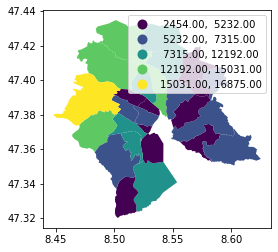

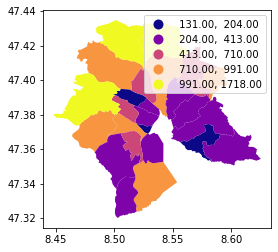

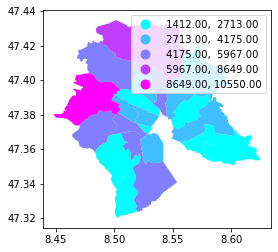

In [38]:
# Plot by StatQuartiere
# Weitere Schemes: scheme='quantiles', scheme='fisherjenks', scheme='natural_breaks',

stadtquartiere_shapes_joined.plot(column='NatCHGebCH', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='NatAuGebCH', cmap='plasma', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stadtquartiere_shapes_joined.plot(column='NatAuGebAu', cmap='cool', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

**Sharepoint als gecheckt markieren!**

Record auf Sharepoint: **[Link](http://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/EditForm.aspx?ID=157&Source=%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs)**